In [5]:
import requests 
import pandas as pd

import requests

demo= '31853220bc5708a36155ca7f0481a5e0'

companies = requests.get(f'https://fmpcloud.io/api/v3/stock-screener?sector=technology&marketCapMoreThan=100000000000&limit=100&apikey={demo}')
companies = companies.json()
technological_companies = []

for item in companies:
  technological_companies.append(item['symbol'])

print(technological_companies)

['AAPL', 'MSFT', 'MSF.BR', 'TSM', 'NVDA', 'INCO.BR', 'INTC', 'ASML', 'ADBE', 'CRM', 'CIS.BR', 'CSCO', 'ASML.AS', 'ORCL', 'SHOP.TO', 'AVGO', 'QCOM', 'ACN', 'TXN', 'SAP', 'SHOP', 'SNE', 'IBMA.BR', 'IBM', 'AMD', 'SQ', 'INTU', 'NOW']


In [6]:
pricetosales = {}
for item in technological_companies:
    try:
      #annual income statement since we need anual sales
      IS = requests.get(f'https://fmpcloud.io/api/v3/income-statement/{item}?apikey={demo}')
      IS = IS.json()
      #print(IS)
      Revenue = IS[0]['revenue']
      grossprofitratip = IS[0]['grossProfitRatio']
      #most recent market capitliazation
      MarketCapit = requests.get(f'https://fmpcloud.io/api/v3/market-capitalization/{item}?apikey={demo}')
      MarketCapit = MarketCapit.json()
      MarketCapit = MarketCapit[0]['marketCap']

      #Price to sales
      p_to_sales = MarketCapit/Revenue

      pricetosales[item] = {}
      pricetosales[item]['revenue'] = Revenue
      pricetosales[item]['Gross_Profit_ratio'] = grossprofitratip
      pricetosales[item]['price_to_sales'] = p_to_sales
      pricetosales[item]['Market_Capit'] = MarketCapit
    except:
      pass
print(pricetosales)

{'AAPL': {'revenue': 274515000000, 'Gross_Profit_ratio': 0.382332477278109, 'price_to_sales': 7.9922556606505255, 'Market_Capit': 2193994062683.479}, 'MSFT': {'revenue': 143015000000, 'Gross_Profit_ratio': 0.6778100199279796, 'price_to_sales': 11.355508192693074, 'Market_Capit': 1624008004178}, 'TSM': {'revenue': 1069988800000, 'Gross_Profit_ratio': 0.46047388533412686, 'price_to_sales': 0.6069711318830889, 'Market_Capit': 649452313038.228}, 'NVDA': {'revenue': 10918000000, 'Gross_Profit_ratio': 0.619894, 'price_to_sales': 29.49275353819381, 'Market_Capit': 322001883130}, 'INTC': {'revenue': 71965000000, 'Gross_Profit_ratio': 0.5855624261793928, 'price_to_sales': 3.4156746826651845, 'Market_Capit': 245809028538}, 'ADBE': {'revenue': 12868000000, 'Gross_Profit_ratio': 0.8661796705004663, 'price_to_sales': 17.26521554981349, 'Market_Capit': 222168793695}, 'CRM': {'revenue': 17098000000, 'Gross_Profit_ratio': 0.752310211720669, 'price_to_sales': 11.705372503275237, 'Market_Capit': 2001384

In [7]:
#Converting Japanese Yen (JPY) equals to US Dollar 
pricetosales["SNE"]["revenue"]=pricetosales["SNE"]["revenue"]/100

In [8]:
pricetosales["SNE"]

{'revenue': 86656870000.0,
 'Gross_Profit_ratio': 0.2772418389909536,
 'price_to_sales': 0.014716045386694328,
 'Market_Capit': 127524643198.88701}

In [9]:
#Converting New Taiwan dollar (twd) US Dollar
pricetosales["TSM"]["revenue"]=pricetosales["TSM"]["revenue"]/28

In [10]:
pricetosales["TSM"]

{'revenue': 38213885714.28571,
 'Gross_Profit_ratio': 0.46047388533412686,
 'price_to_sales': 0.6069711318830889,
 'Market_Capit': 649452313038.228}

In [11]:
#IS

In [12]:
price_to_sales_df = pd.DataFrame.from_dict(pricetosales, orient='index')


In [13]:
price_to_sales_df['ps_average_sector'] = price_to_sales_df['price_to_sales'].mean()
price_to_sales_df['pscompany_vs_averagesector'] = price_to_sales_df['price_to_sales'] - price_to_sales_df['ps_average_sector']
price_to_sales_df['price_as_per_average_industryPS'] = price_to_sales_df['ps_average_sector'] * price_to_sales_df['revenue']
price_to_sales_df['price_difference'] = price_to_sales_df['price_as_per_average_industryPS'] - price_to_sales_df['Market_Capit']

In [14]:
price_to_sales_df

,revenue,Gross_Profit_ratio,price_to_sales,Market_Capit,ps_average_sector,pscompany_vs_averagesector,price_as_per_average_industryPS,price_difference
AAPL,2.745150e+11,0.382332,7.992256,2.193994e+12,14.462075,-6.469819,3.970057e+12,1.776062e+12
MSFT,1.430150e+11,0.677810,11.355508,1.624008e+12,14.462075,-3.106567,2.068294e+12,4.442857e+11
TSM,3.821389e+10,0.460474,0.606971,6.494523e+11,14.462075,-13.855104,5.526521e+11,-9.680023e+10
NVDA,1.091800e+10,0.619894,29.492754,3.220019e+11,14.462075,15.030678,1.578969e+11,-1.641049e+11
INTC,7.196500e+10,0.585562,3.415675,2.458090e+11,14.462075,-11.046400,1.040763e+12,7.949542e+11
ADBE,1.286800e+10,0.866180,17.265216,2.221688e+11,14.462075,2.803140,1.860980e+11,-3.607081e+10
CRM,1.709800e+10,0.752310,11.705373,2.001385e+11,14.462075,-2.756703,2.472726e+11,4.713410e+10
CSCO,4.930100e+10,0.642644,3.908928,1.927141e+11,14.462075,-10.553147,7.129948e+11,5.202807e+11
ASML.AS,1.182000e+10,0.446684,15.457557,1.827083e+11,14.462075,0.995482,1.709417e+11,-1.176659e+10
ORCL,3.906800e+10,0.796816,4.913240,1.919505e+11,14.462075,-9.548835,5.650044e+11,3.730539e+11


<AxesSubplot:>

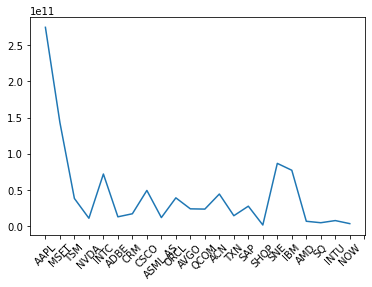

In [15]:
price_to_sales_df.revenue.plot(rot=45, xticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,])


In [16]:
price_to_sales_df.index.tolist()

['AAPL',
 'MSFT',
 'TSM',
 'NVDA',
 'INTC',
 'ADBE',
 'CRM',
 'CSCO',
 'ASML.AS',
 'ORCL',
 'AVGO',
 'QCOM',
 'ACN',
 'TXN',
 'SAP',
 'SHOP',
 'SNE',
 'IBM',
 'AMD',
 'SQ',
 'INTU',
 'NOW']